In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import json
import scipy.linalg

<h1>Define Walsh Function Using the formula Walsh Function</h1>
<p> Referance Website :- https://mathworld.wolfram.com/WalshFunction.html</p>

In [12]:
def Hadamard2Walsh(n):
  
   
    from scipy.linalg import hadamard
    from math import log

    hadamardMatrix=hadamard(n)
    HadIdx = np.arange(n)
    M = int(log(n,2))+1

    for i in HadIdx:
        s=format(i, '#032b')
        s=s[::-1]; s=s[:-2]; s=list(s)
        x=[int(x) for x in s]
        x=np.array(x)
        if(i==0):
            binHadIdx=x
        else:
            binHadIdx=np.vstack((binHadIdx,x))

    binSeqIdx = np.zeros((n,M)).T

    for k in reversed(range(1,int(M))):
        tmp=np.bitwise_xor(binHadIdx.T[k],binHadIdx.T[k-1])
        binSeqIdx[k]=tmp

    tmp=np.power(2,np.arange(M)[::-1])
    tmp=tmp.T
    SeqIdx = np.dot(binSeqIdx.T,tmp)

    j=1
    for i in SeqIdx:

        if(j==1):
            walshMatrix=hadamardMatrix[int(i)]
        else:
            walshMatrix=np.vstack((walshMatrix,hadamardMatrix[int(i)]))
        j+=1
        
    return hadamardMatrix,walshMatrix

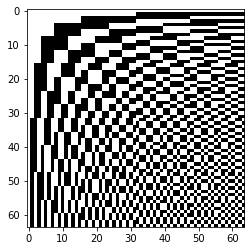

In [13]:
n = 64
(H,W)=Hadamard2Walsh(n)

plt.imshow(W, cmap='gray');

In [14]:
kernels = []

l = int(np.sqrt(W.shape[0]))

for i in range(l):
    subw = np.zeros_like(W)
    subw[:] = W[:,i].copy()
    kernels.append(subw)

    
walsh = []
for i in range(l):
    for j in range(l):
        walsh.append(kernels[i] * kernels[j].T)

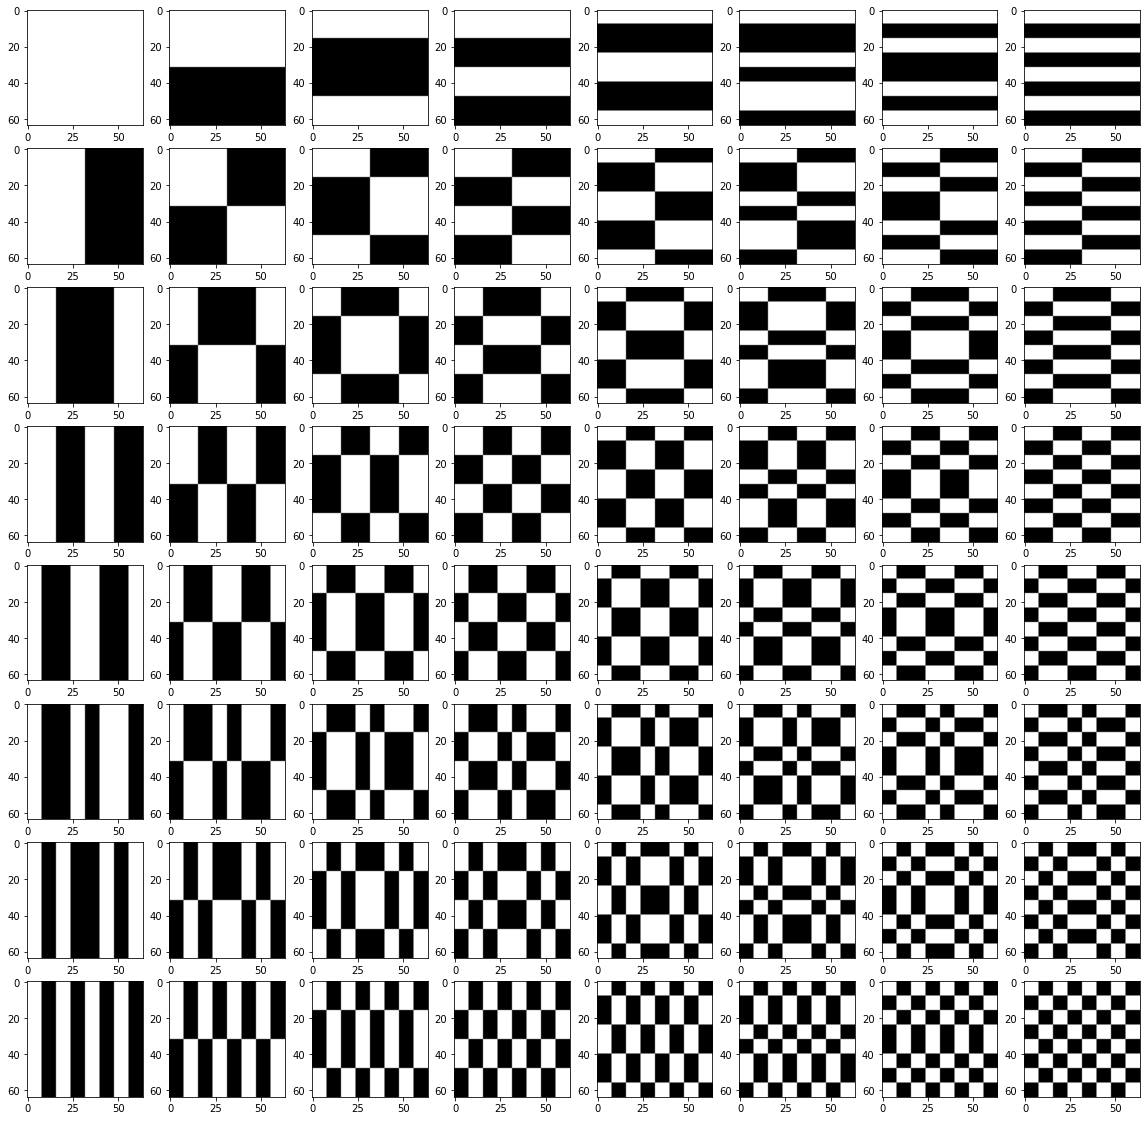

In [15]:
fig, ax = plt.subplots(8,8, figsize=(20,20))
k=0
for i in range(l):
    for j in range(l):
        ax[i,j].imshow(walsh[k], cmap='gray', vmin=-1, vmax=1)
        k+=1

In [16]:
to_save = []
for w in walsh:
    to_save.append(w.tolist())
    
with open("../res/walsh.json", "w") as f:
    f.write(json.dumps(to_save, indent=2))
    
print("Saved.")

FileNotFoundError: [Errno 2] No such file or directory: '../res/walsh.json'